# PROJETO PARTE 5 - AGRUPAMETOS 

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
arquivo = pd.read_csv("C:/Users/davi-/OneDrive/Documentos/Arquivos/Users/Materiais_Assuntos/Ciência de dados/projeto ciência de dados/def_area_2004_20191.csv")
arquivo.rename(columns={'1':'ANO_ESTADO','1.1':'AC','1.2':'AM','1.3':'AP','1.4':'MA','1.5':'MT','1.6':'PA','1.7':'RO','1.8':'RR','1.9':'TO','1.10':'AMZ_LEGAL'},inplace=True)
sns.set_palette("Set1")
#Função
def Medidas_Centralidade_Dispersao(coluna):
        print("Área de desmatamento (km²) por ano e estado, de 2004 a 2019, para a coluna :",coluna)
        print("Média : ", arquivo[coluna].mean())
        print("Mediana : ",arquivo[coluna].median())
        print("Desvio Padrão : ",arquivo[coluna].std())
        print("Variância : ",arquivo[coluna].var())
        print("Moda :\n",arquivo[coluna].mode())
        conc.boxplot(column=coluna)

In [55]:
arquivo

,ANO_ESTADO,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ_LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911
5,2009,167,405,70,828,1049,4281,482,121,61,7464
6,2010,259,595,53,712,871,3770,435,256,49,7000
7,2011,280,502,66,396,1120,3008,865,141,40,6418
8,2012,305,523,27,269,757,1741,773,124,52,4571
9,2013,221,583,23,403,1139,2346,932,170,74,5891


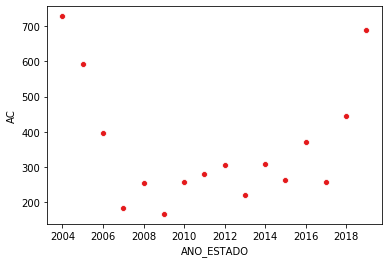

In [56]:
sns.scatterplot(data=arquivo,x = "ANO_ESTADO", y = "AC")

In [57]:
from sklearn.cluster import KMeans

In [58]:
arquivo_grup = arquivo[["ANO_ESTADO","AC"]]

In [59]:
 kmeans = KMeans(n_clusters = 3, #numero de clusters
init = 'random', n_init = 10, #algoritmo que define a posição dos clusters de maneira mais assertiva
max_iter = 300) #numero máximo de iterações

In [60]:
kmeans.fit(arquivo_grup)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [61]:
kmeans.cluster_centers_

array([[2011.6       ,  250.        ],
       [2009.33333333,  669.33333333],
       [2013.33333333,  404.66666667]])

In [62]:
distance = kmeans.fit_transform(arquivo_grup)
distance

array([[ 58.90859209, 323.46801319, 478.06041459],
       [ 77.45464623, 187.51859167, 342.06367828],
       [271.35380758,   9.9107125 , 148.10590805],
       [485.33894228, 220.75753416,  66.16010883],
       [415.33547351, 150.7610324 ,   5.38144962],
       [502.33344393, 237.70616783,  83.04071291],
       [410.3338749 , 145.7048005 ,   9.14111591],
       [389.33690067, 124.68850076,  30.0059994 ],
       [364.34309228,  99.67558489,  55.00145453],
       [448.34832689, 183.66696915,  29.03377344],
       [360.363551  ,  95.66898952,  59.04879338],
       [405.37294214, 140.67653994,  14.40694277],
       [297.40806236,  32.77532948, 122.07931848],
       [412.40460176, 147.7121826 ,   8.84081444],
       [225.49993841,  39.60920207, 194.1055383 ],
       [ 21.02115337, 283.38999433, 438.06250696]])

In [74]:
labels = kmeans.labels_
labels

array([0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0])

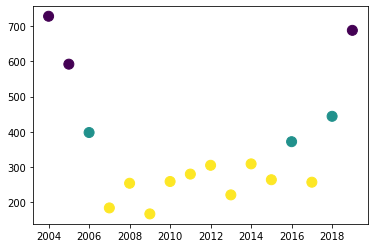

In [76]:
plt.scatter(arquivo_grup.iloc[:,0], arquivo_grup.iloc[:,1], s = 100, c = kmeans.labels_)
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',labels = 'Centroids')

plt.show()